This is the code for Linear Regression with gradient Descent with using Scikitlearn library 

In [1]:
import numpy as np

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data 

In [7]:
data = pd.read_csv("insuranceData.csv")

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [52]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0, 0.5, 'Frequency')

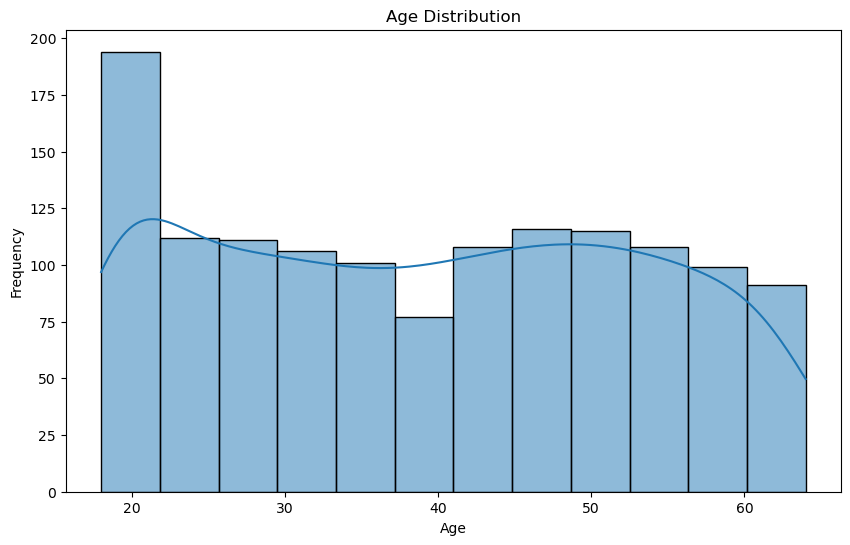

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Charges')

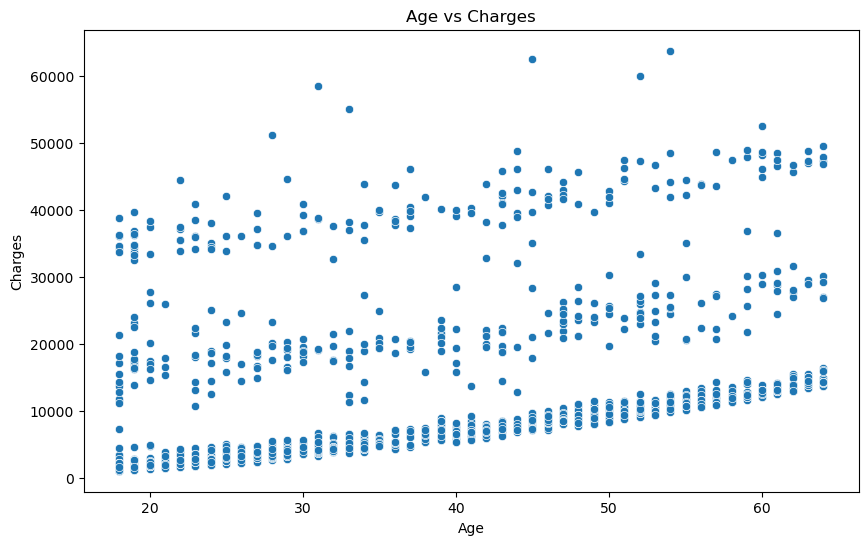

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

Below is the function for Gradient descent

In [72]:
def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    c, m = 0, 0  
    n = len(x)
    for _ in range(epochs):
        y_pred =[c + m * x[i] for i in range(n)]
        error =[y[i] - y_pred[i] for i in range(n)]
       
        c_grad = -2*sum(error) / n
        m_grad = -2*sum(error[i]*x[i] for i in range(n)) / n
       
        c -= learning_rate*c_grad
        m -=learning_rate * m_grad
   
    return c, m
    

In [48]:
def predict(x,c,m):
    return m * x + c


Fixing the values for X and y

In [46]:
x=data["age"].tolist()
y=data["charges"].tolist()

In [74]:
c, m = gradient_descent(x, y, learning_rate=0.000001, epochs=10000)
print(f"\nCoefficients: c = {c}, m = {m}")

x_test = [30, 40, 33, 50]
predictions = [predict(i, c, m) for i in x_test]
print("Predictions:", predictions)



Coefficients: c = 14.612520593066662, m = 328.96162591834076
Predictions: [9883.461298143291, 13173.077557326698, 10870.346175898312, 16462.693816510102]


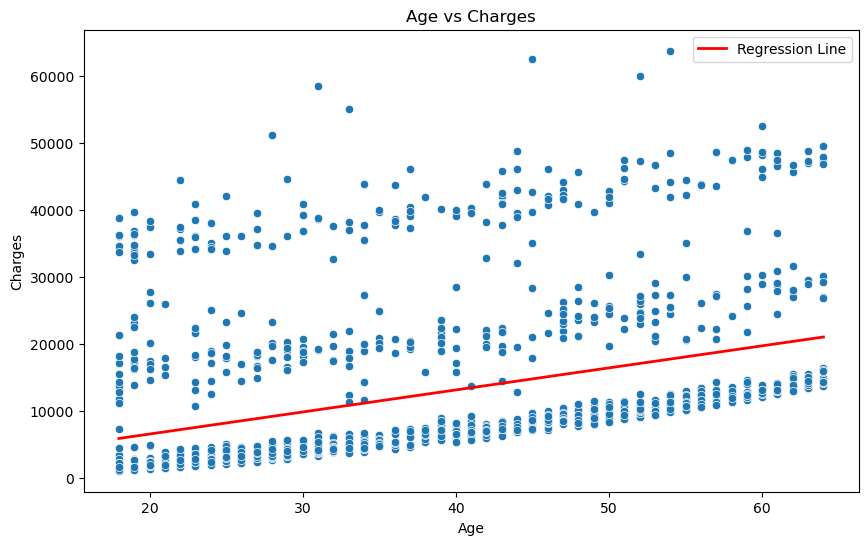

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['age'], y=data['charges'])
x_values = np.linspace(data['age'].min(), data['age'].max(), 100)
y_values = m * x_values + c
plt.plot(x_values, y_values, color='red', linewidth=2, label="Regression Line")

plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()